In [14]:
import torchvision
import torch
from torch.utils.data import DataLoader
import numpy as np

In [2]:
baseline_model = torch.load("data/baseline_model.pt")

In [3]:
baseline_model.fc = torch.nn.Identity()
baseline_model

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [4]:
test_dataset = torch.load("data/test_baseline.pt")
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [8]:
device = "cuda"

In [47]:
def get_feature_vectors(dataloader, model):
    
    feature_vectors = []
    labels = []
    model.eval()
    
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            
            
            feature_vector = model(X)
            X = X.cpu()
            feature_vector, y = feature_vector.cpu(), y.cpu()
            
            feature_vectors.extend(feature_vector)
            labels.extend(y)
    return feature_vectors, labels

In [48]:
vectors, labels = get_feature_vectors(test_dataloader, baseline_model)

In [54]:
len(vectors), len(labels)


(2620, 2620)

In [55]:
from torch.nn.functional import cosine_similarity

In [90]:
n_correct = 0
n_total = len(vectors)
corrects = []

for i, base in enumerate(zip(vectors, labels)):
    
    max_similarity = 0 
    max_index = 0
    
    for j, pair in enumerate(zip(vectors, labels)):
        if i == j:
            continue
        sim = cosine_similarity(base[0], pair[0], axis=0)
        
        if sim > max_similarity:
            max_similarity = sim
            max_index = j
            
    if labels[max_index] == labels[i]:
        n_correct += 1
        corrects.append((i, max_index))
        

In [87]:
n_correct / n_total

0.17709923664122137

In [88]:
print(corrects)

[(4, 5), (12, 13), (26, 27), (34, 35), (50, 51), (58, 59), (70, 71), (74, 75), (76, 77), (86, 87), (92, 93), (96, 97), (100, 101), (106, 107), (126, 127), (130, 131), (132, 133), (140, 141), (142, 143), (148, 149), (150, 151), (154, 155), (156, 157), (162, 163), (172, 173), (176, 177), (180, 181), (188, 189), (190, 191), (198, 199), (214, 215), (258, 259), (260, 261), (264, 265), (266, 267), (272, 273), (280, 281), (284, 285), (294, 295), (304, 305), (314, 315), (328, 329), (346, 347), (360, 361), (362, 363), (370, 371), (374, 375), (388, 389), (392, 393), (398, 399), (400, 401), (404, 405), (406, 407), (408, 409), (418, 419), (422, 423), (446, 447), (454, 455), (464, 465), (492, 493), (496, 497), (498, 499), (508, 509), (510, 511), (514, 515), (526, 527), (536, 537), (538, 539), (544, 545), (546, 547), (548, 549), (552, 553), (554, 555), (566, 567), (580, 581), (592, 593), (594, 595), (596, 597), (602, 603), (616, 617), (618, 619), (630, 631), (650, 651), (670, 671), (676, 677), (718,

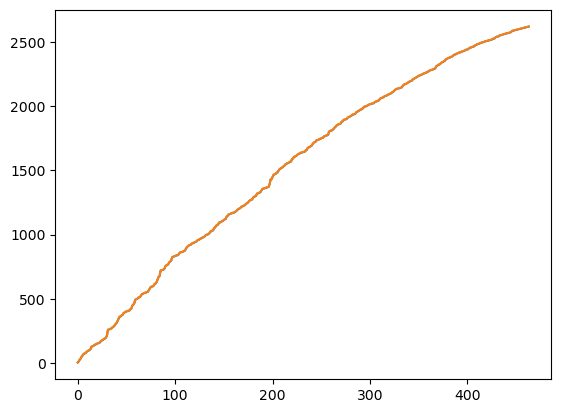

In [89]:
import matplotlib.pyplot as plt
plt.plot(corrects)